In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('news_data/train.csv')
test = pd.read_csv('news_data/test.csv')

train.head()

,id,text,target
0,0,"\nThey were, and even if Washington might cons...",10
1,1,"We run ""SpaceNews & Views"" on our STAREACH BBS...",14
2,2,\n\n\nNot to worry. The Masons have been demo...,19
3,3,"Only Brendan McKay, or maybe ARF, would come t...",17
4,4,Help: I am running some sample problems from O...,5


In [3]:
temp = train.target.unique() # 라벨의 고유값 확인
np.sort(temp)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [4]:
# 결측치 
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9233 entries, 0 to 9232
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9233 non-null   int64 
 1   text    9233 non-null   object
 2   target  9233 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 216.5+ KB


### Text 기초 전처리

In [6]:
train.text

0       \nThey were, and even if Washington might cons...
1       We run "SpaceNews & Views" on our STAREACH BBS...
2       \n\n\nNot to worry.  The Masons have been demo...
3       Only Brendan McKay, or maybe ARF, would come t...
4       Help: I am running some sample problems from O...
                              ...                        
9228    \n\nPrecisely, why not Cuba??  Why not???  The...
9229    Your Custom Resume On Disk!\n \n              ...
9230    Throughout the years of the Israel/Arab-Palest...
9231    Does anyone know if there are any devices avai...
9232    \n\n      Give ME a break, chum.  Are you tell...
Name: text, Length: 9233, dtype: object

In [7]:
# 정규 표현식 사용 

import re 

def clean_text(texts): 
  corpus = [] 
  for i in range(0, len(texts)): 
        
    #@%*=()/+ 와 같은 문장부호 제거
    review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '',texts[i]) 
    
    
    review = re.sub(r'\d+','', review)#숫자 제거
    
    review = review.lower() #소문자 변환
    
    review = re.sub(r'\s+', ' ', review) #extra space 제거
    
    review = re.sub(r'<[^>]+>','',review) #Html tags 제거
    
    review = re.sub(r'\s+', ' ', review) #spaces 제거
    
    review = re.sub(r"^\s+", '', review) #space from start 제거
    
    review = re.sub(r'\s+$', '', review) #space from the end 제거
    
    review = re.sub(r'_', ' ', review) #space from the end 제거
    
    corpus.append(review) 
  
  return corpus

In [8]:
temp = clean_text(train['text']) #메소드 적용
train['text'] = temp
train.head()

,id,text,target
0,0,they were and even if washington might conside...,10
1,1,we run spacenews views on our stareach bbs a l...,14
2,2,not to worry the masons have been demonized an...,19
3,3,only brendan mckay or maybe arf would come to ...,17
4,4,help i am running some sample problems from or...,5


In [9]:
# 뉴스 그룹 비율 확인

val_count = train['target'].value_counts()

for i in range(0,20):
  print(f'라벨 {i}인 리뷰 개수:', val_count[i])

라벨 0인 리뷰 개수: 386
라벨 1인 리뷰 개수: 480
라벨 2인 리뷰 개수: 458
라벨 3인 리뷰 개수: 467
라벨 4인 리뷰 개수: 490
라벨 5인 리뷰 개수: 496
라벨 6인 리뷰 개수: 494
라벨 7인 리뷰 개수: 493
라벨 8인 리뷰 개수: 475
라벨 9인 리뷰 개수: 490
라벨 10인 리뷰 개수: 482
라벨 11인 리뷰 개수: 488
라벨 12인 리뷰 개수: 483
라벨 13인 리뷰 개수: 490
라벨 14인 리뷰 개수: 467
라벨 15인 리뷰 개수: 515
라벨 16인 리뷰 개수: 428
라벨 17인 리뷰 개수: 455
라벨 18인 리뷰 개수: 387
라벨 19인 리뷰 개수: 309


### 데이터 시각화

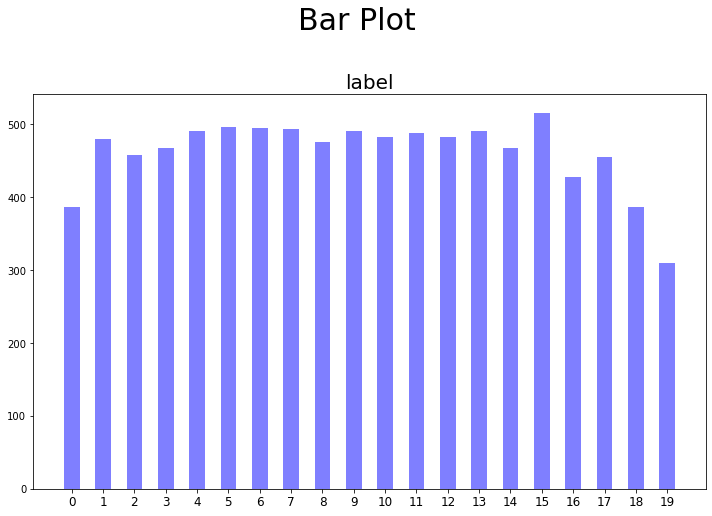

In [10]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = train['target']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

### 뉴스 text 길이 확인 

In [11]:
str_len_mean = np.mean(train['text'].str.len())# 리뷰 길이의 평균값 계산 
print('뉴스의 평균길이 :' , round(str_len_mean), 0)

뉴스의 평균길이 : 1020 0


In [12]:
# 데이터 필터링을 위한 마스크 설정
for i in range(0, 20):
  globals()['mask_{}'.format(i)] = (train.target == i)

# 전체 및 그룹 집합을 설정합니다.
df_train = train.text.copy() # 전체 train 데이터

for i in range(0, 20):
  globals()['df_{}'.format(i)] = train.loc[globals()['mask_{}'.format(i)],:].text # 20가지 라벨 각각에 해당하는 데이터를 df0~19로 할당

# 스무가지로 나뉜 집합을 리스트로 묶어줍니다.
compare = [df_0, df_1, df_2, df_3, df_4, df_5, 
           df_6, df_7, df_8, df_9, df_10, df_11,
           df_12, df_13, df_14, df_15, df_16, df_17,
           df_18, df_19]

In [13]:
df_0

52      deleted stuff from andrew wrt which atheist my...
56      deletia in case anybody hadnt noticed frank an...
95      due to a discussion on this group some time ag...
113     no bobby stalin killed millions in the name of...
139     issued by khomeini it shouldnt be relevant to ...
                              ...                        
9116    wait a minute i thought you said that allah i ...
9138    i recall a discussion i had heard years ago it...
9149    i wonder how many atheists out there care to s...
9171    are you saying that their was a physical adam ...
9226    id like this too maybe you should post an answ...
Name: text, Length: 386, dtype: object

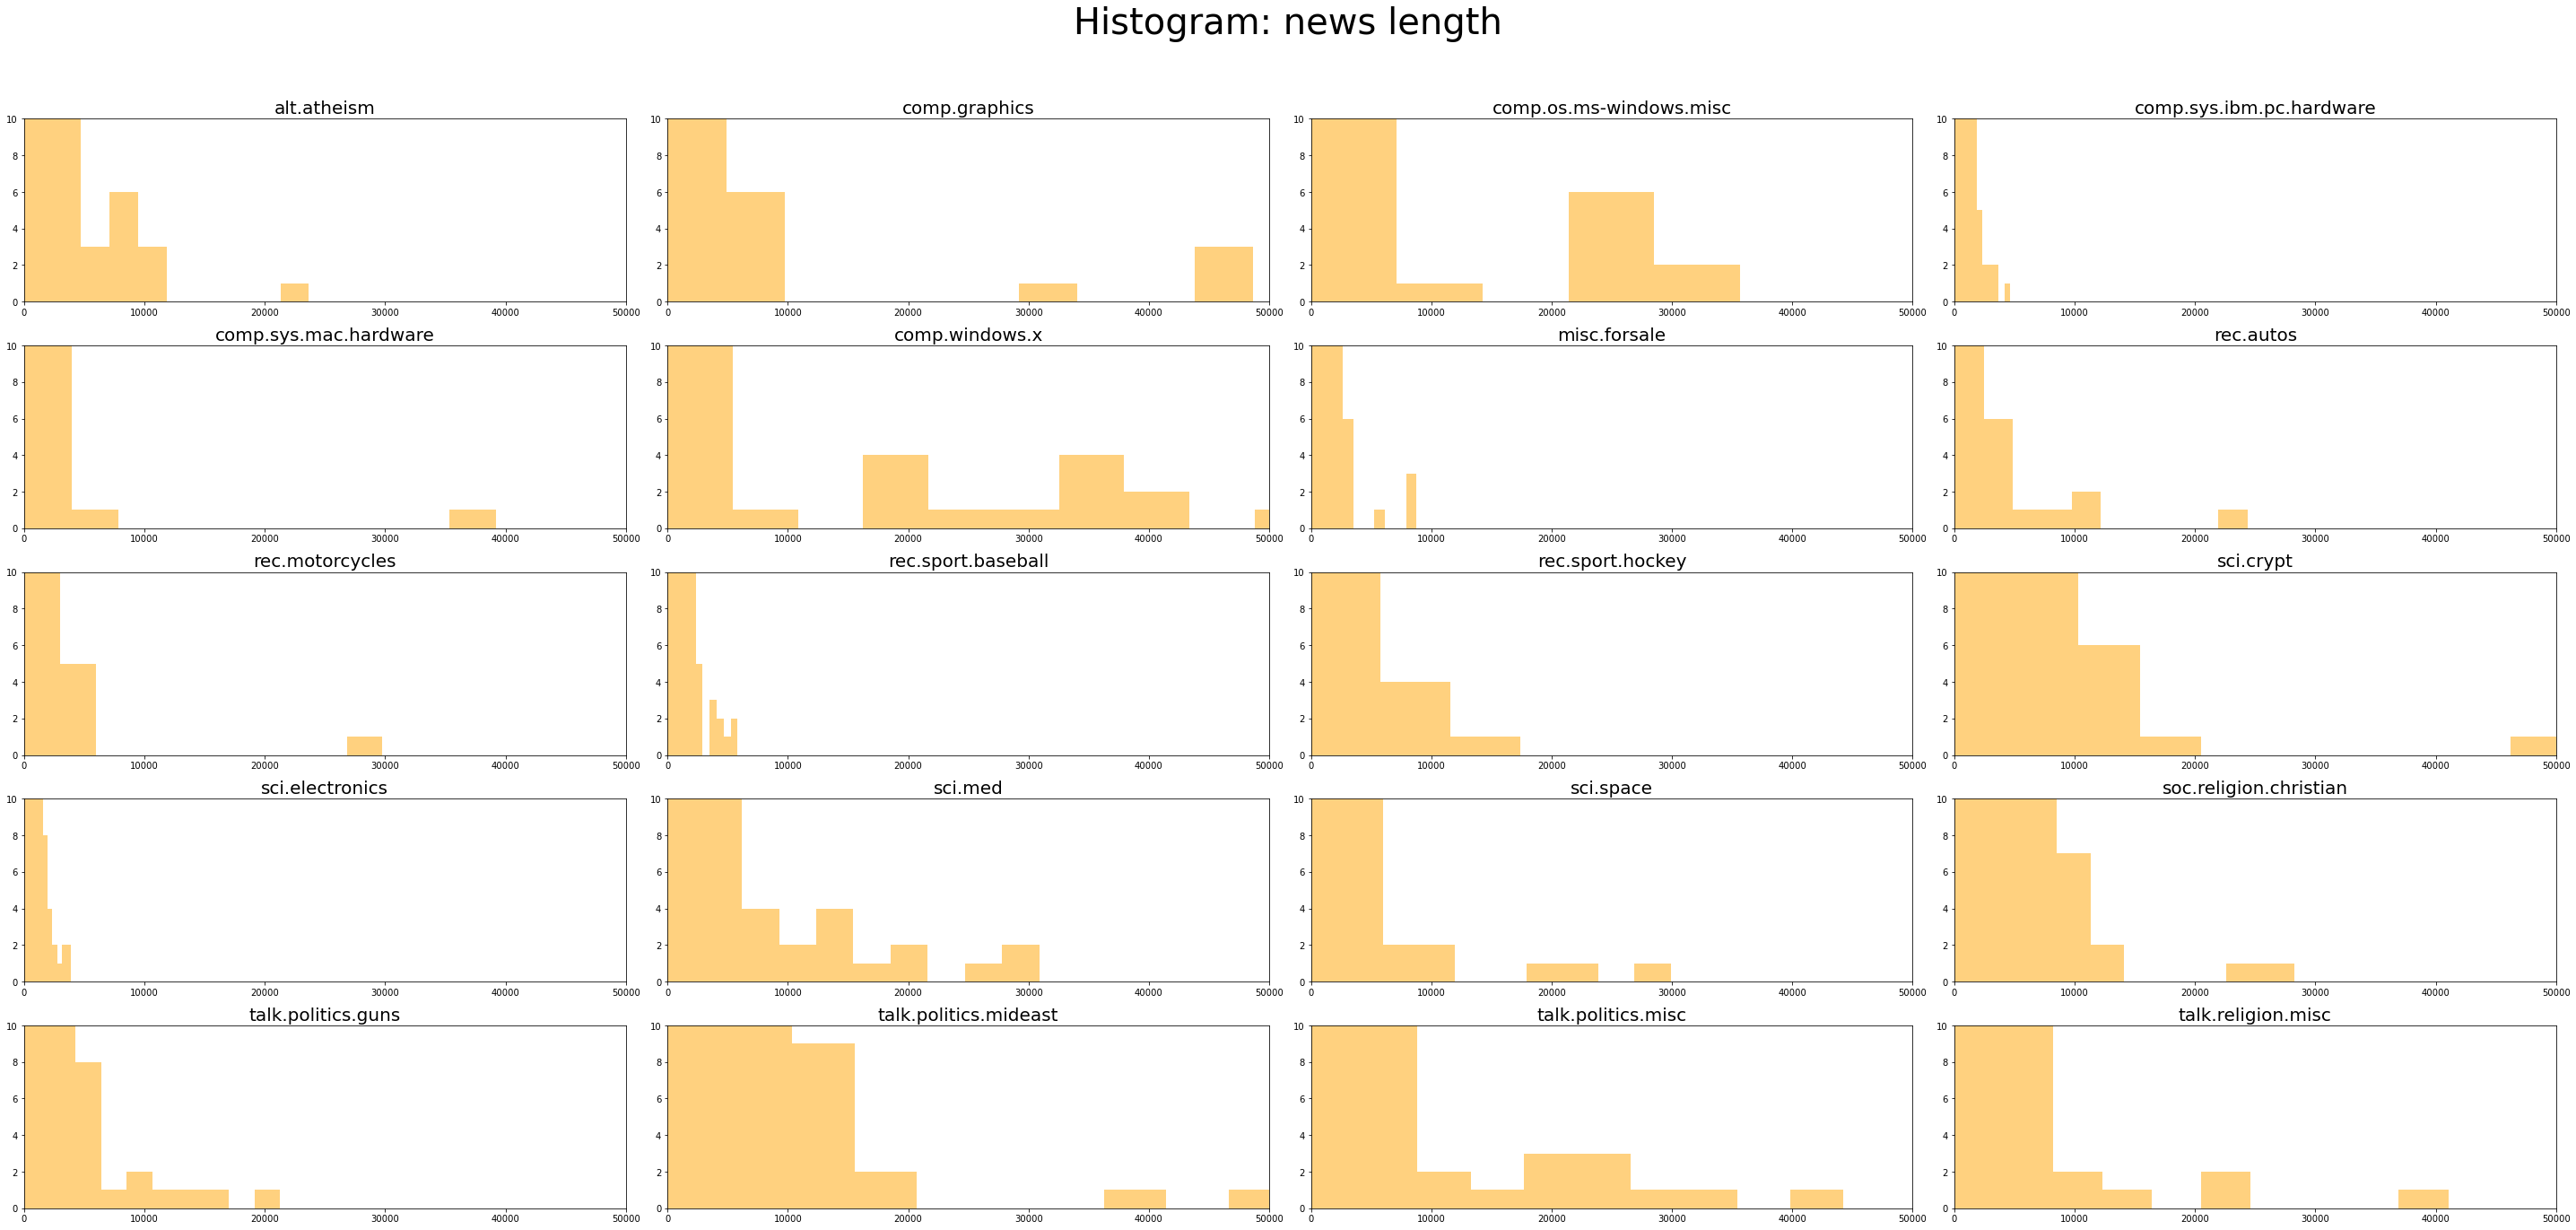

In [14]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(40,20))
plt.suptitle("Histogram: news length", fontsize=40)
name = ['alt.atheism',
        'comp.graphics',
        'comp.os.ms-windows.misc',
        'comp.sys.ibm.pc.hardware',
        'comp.sys.mac.hardware',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
        'rec.motorcycles',
        'rec.sport.baseball',
        'rec.sport.hockey',
        'sci.crypt',
        'sci.electronics',
        'sci.med',
        'sci.space',
        'soc.religion.christian',
        'talk.politics.guns',
        'talk.politics.mideast',
        'talk.politics.misc',
        'talk.religion.misc'] # 제목으로 사용할 문자열 (라벨의 실제 이름)

for i in range(len(compare)):
    text = compare[i]
    string_len = [len(x) for x in text]    
    plt.subplot(5,4,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([0, 50000, 0, 10])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(string_len, alpha=0.5, color='orange') # 히스토그램 생성, alpha: 그래프의 투명도 조절
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Word Cloud 
워드 클라우드(word cloud)란?
태그 클라우드와 동의어인 워드 클라우드는 문서의 키워드 등을 직관적으로 파악할 수 있도록 하는 시각화 기법입니다.

예를 들어, 문서에 자주 언급된 단어일수록 크게 시각화하여 문서에서 등장하는 주요 단어들을 한눈에 파악할 수 있습니다.

이 기법은 문서 빅데이터 분석에서 자주 사용되곤 합니다.



In [15]:
# 패키지 불러오기 

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
# "NLTK는 Natural Language Toolkit의 줄임말입니다. 
#Python 프로그래밍 언어로 작성된 영어의 기호 및 통계 자연 언어 처리를위한 라이브러리 및 프로그램 모음입니다"
import nltk
import pickle
from nltk.corpus import stopwords
from os import path
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Down

[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Packa

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |     /Users/wonminjae/nltk_data...
[nltk_data]    |   Package ycoe is alre

True

In [16]:
def df2str(df) :
    
    s= [s for s in df]
    document = ''
    for i in range(len(s)) :
        document += s[i]
    return document

### 워드 토큰화 

In [17]:
word_tokens = nltk.word_tokenize(df2str(df_0))

### 품사 분리 POS tagging
데이터 분석에 가장 큰 의미를 갖는 형태소인 명사만을 추출하기 위하여
토큰화된 단어의 품사를 분리해보도록 하겠습니다.
nltk의 pos_tag 메소드를 이용하여 품사분리를 진행합니다.



In [18]:
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
tokens_pos = nltk.pos_tag(word_tokens)

### 명사만 추출

In [19]:
# 명사는 NN을 포함하고 있음을 알 수 있음
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)

## 품사 원형 찾기
워드클라우드 단어의 빈도수를 정확히 축정하기 위하여 단어의 원형형태로 통일해보도록 하겠습니다.

nltk에서 제공하는 WordNetLemmatizer() 메소드를 이용해 보겠습니다.

In [20]:
# 명사의 경우 보통 복수 -> 단수 형태로 변형
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

### 불용어 처리
nltk에서 제공하는 불용어 기본 사전 이용하여 워드클라우드에 사용하지 않을 단어를 제거해 봅시다.

In [21]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

### 빈도분석

In [22]:
from collections import Counter
c = Counter(final_NN_words)
k = 10

In [23]:
c.most_common(k) # 빈도수 기준 상위 k개 단어 출력

[('god', 190),
 ('people', 176),
 ('argument', 122),
 ('time', 105),
 ('thing', 99),
 ('way', 97),
 ('book', 90),
 ('question', 89),
 ('something', 87),
 ('religion', 84)]

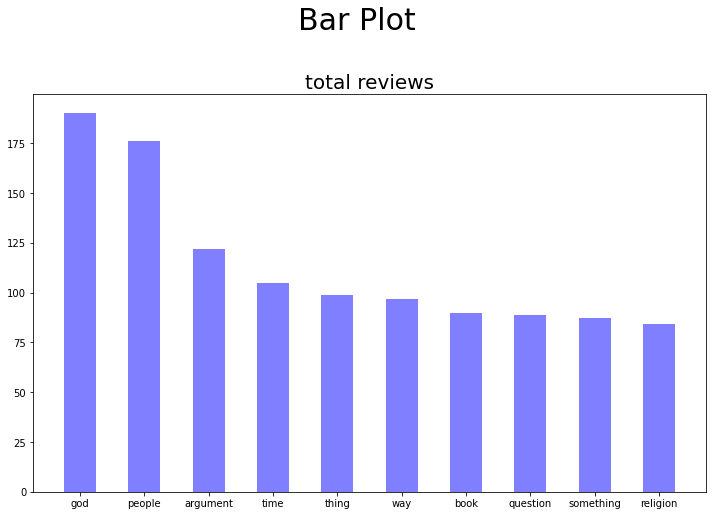

In [24]:
top_10 = c.most_common(k) # 추출한 명사 중 상위 10개
keys = [top_10[i][0] for i in range(len(top_10))]
values = [top_10[i][1] for i in range(len(top_10))]

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('total reviews', fontsize=20)
plt.bar(keys, values, width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

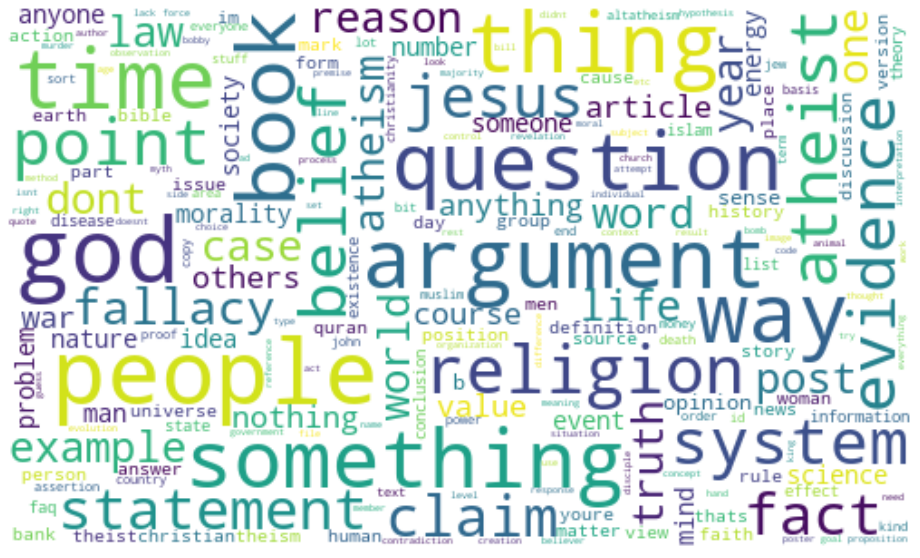

In [25]:
# 워드클라우드

noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=50, #가장 큰 폰트 크기 제한
                      width=500, #너비
                      height=300, #높이
                      background_color='white', #배경 색상
                      relative_scaling=.2 #상대적인 크기
                      ).generate(noun_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
